(PROGLINEAL)=

# 4.2 Programación lineal

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

*

```

```{sidebar} Un poco de historia ...

El desarrollo de la programación lineal (PL) ha sido clasificado como uno de los avances científicos más importantes de mediados del siglo XX. Es quizás el modelo prototipo de la optimización con restricciones. El efecto que ha tenido en la práctica y en áreas del conocimiento desde 1950 es en verdad grande. El tipo más común de aplicación abarca el problema general de asignar de la mejor manera posible, esto es, de forma óptima, recursos limitados a actividades que compiten entre sí por ellos. Con más precisión, se desea elegir el nivel de ciertas actividades que compiten por recursos escasos necesarios para realizarlas y se puedan asignar recursos a tales actividades. El desarrollo por Dantzig del método símplex para resolver programas lineales en los $40$'s marcó el inicio de la era moderna en optimización. 

La PL utiliza un modelo matemático para describir el problema. El adjetivo lineal significa que todas las funciones matemáticas del modelo deben ser funciones lineales. En este caso, la palabra programación no se refiere a términos computacionales; en esencia es sinónimo de planeación. Por lo tanto, la PL involucra la planeación de actividades para obtener un resultado óptimo; esto es, el resultado que mejor alcance la meta establecida, de acuerdo con el modelo matemático, entre todas las alternativas factibles.

Aunque la asignación de recursos a las actividades es la aplicación más frecuente en PL, cualquier problema cuyo  modelo matemático se ajuste al formato general del modelo de PL, es un problema de PL.

```

Un programa lineal **en su forma estándar** es un problema de optimización con una función lineal objetivo, un conjunto de restricciones lineales y un conjunto de restricciones no negativas impuestas a las variables. Es un **modelo de optimización** de la forma:

$$\min c^Tx$$

$$\text{sujeto a:}$$

$$Ax=b$$

$$x \geq 0$$

donde: $A \in \mathbb{R}^{m \times n}$ y se **asume** $m \leq n$ y tiene *rank* completo por renglones y la última desigualdad se refiere a que todas las componentes del vector $x$ son mayores o iguales a cero.

## Ejemplo: flujo en redes

Considérese el problema de satisfacer la demanda de todos los nodos con etiquetas "A, B, C, D" y "E" de la siguiente red de acuerdo a las capacidades de cada uno de ellos al menor costo posible:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

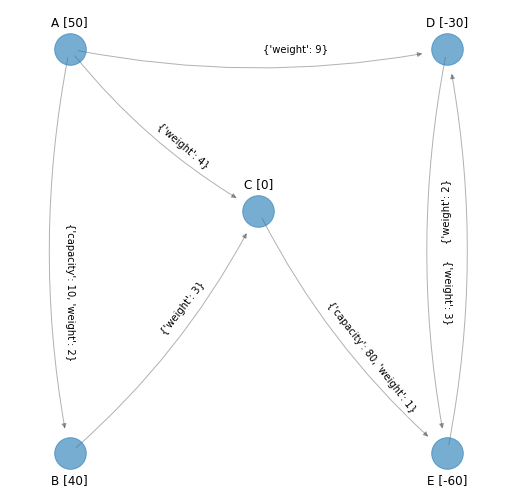

In [2]:
nodes_pos = [[0.18181818181818182, 0.7272727272727273],
             [0.18181818181818182, 0.2727272727272727],
             [0.5454545454545454, 0.2727272727272727],
             [0.5454545454545454, 0.7272727272727273],
             [0.36363636363636365, 0.5454545454545454]]

nodes = ['A', 'B', 'E', 'D', 'C']

nodes_and_pos = dict(zip(nodes, nodes_pos))

G_min_cost_flow = nx.DiGraph()

G_min_cost_flow.add_node('A', demand = 50, node_and_demand="A [50]")
G_min_cost_flow.add_node('B', demand = 40, node_and_demand="B [40]")
G_min_cost_flow.add_node('C', demand = 0, node_and_demand="C [0]")
G_min_cost_flow.add_node('D', demand = -30, node_and_demand="D [-30]")
G_min_cost_flow.add_node('E', demand = -60, node_and_demand="E [-60]")

edge_labels_min_cost_flow = {('A', 'B'): {"capacity": 10,
                            "weight": 2},
                             ('A', 'C'): {"weight": 4},
                             ('A', 'D'): {"weight": 9},
                             ('B', 'C'): {"weight": 3},
                             ('C', 'E'): {"capacity": 80,
                                          "weight": 1},
                             ('E', 'D'): {"weight": 2},
                             ('D', 'E'): {"weight": 3}
                            }


G_min_cost_flow.add_edges_from(edge_labels_min_cost_flow)
for e in G_min_cost_flow.edges():
    if e == ('A', 'B') or e == ('C', 'E'):
        G_min_cost_flow[e[0]][e[1]]["capacity"] = edge_labels_min_cost_flow[e]["capacity"]
        G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
    else:
        G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
        
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_min_cost_flow, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_min_cost_flow, pos=nodes_and_pos, 
                             edge_labels=edge_labels_min_cost_flow, label_pos=0.4,
                             font_size=10)
nodes_pos_modified = {}

y_off = 0.03

nodes_and_pos_modified = nodes_and_pos.copy()

for node in G_min_cost_flow.nodes():
    if node == 'B' or node == 'E':
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] - y_off]
    else:
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] + y_off]
        
    
labels = nx.get_node_attributes(G_min_cost_flow, "node_and_demand")

nx.draw_networkx_labels(G_min_cost_flow, pos=nodes_and_pos_modified, 
                        labels=labels)
nx.draw_networkx_nodes(G_min_cost_flow, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

En la red anterior el arco $(D, E)$ tiene costo igual a $3$ y el arco $(E, D)$ tiene costo igual a $2$.

```{margin}

Obsérvese que es ligeramente distinta la nomenclatura de este problema en cuanto a los términos de flujo neto y demanda que tiene un nodo de acuerdo a lo que se describió en el {ref}`ejemplo de flujo de costo mínimo <EJREDFLUJOCOSTOMIN>`

```

Al lado de cada nodo en corchetes se presenta el flujo neto generado por el nodo. Los nodos origen tienen un flujo neto positivo y en la red son los nodos "A" y "B" (por ejemplo fábricas). Los nodos destino tienen un flujo neto negativo que en la red son los nodos "D" y "E" (por ejemplo clientes). El único nodo de transbordo es el nodo "C" que tiene flujo neto igual a cero (centro de distribución por ejemplo). Los valores de los costos se muestran en los arcos. Únicamente se tienen capacidades en los arcos $(A, B)$ igual a $10$ y el arco $(C, E)$ igual a $80$.

Entonces el modelo de programación lineal considerando que el **flujo neto** de un nodo es igual al flujo total que sale del nodo menos el flujo total que entra al nodo es:

$$\displaystyle \min 2 x_{AB} + 4 x_{AC} + 9 x_{AD} + 3 x_{BC} + x_{CE} + 3 x_{DE} + 2x_{ED}$$

$$\text{sujeto a: }$$

$$
\begin{eqnarray}
&x_{AB}&  + &x_{AC}& + &x_{AD}&   &&         &&         &&         &&       &=& 50 \nonumber \\
&-x_{AB}&   &&         &&       + &x_{BC}&   &&         &&         &&       &=& 40 \nonumber \\
&&        - &x_{AC}&   &&       - &x_{BC}& + &x_{CE}&   &&         &&       &=& 0 \nonumber \\
&&          &&       - &x_{AD}&   &&         &&       + &x_{DE}& - &x_{ED}& &=& -30 \nonumber \\
&&          &&         &&         &&       - &x_{CE}& - &x_{DE}& + &x_{ED}& &=& -60 \nonumber
\end{eqnarray}
$$

$$x_{ij} \geq 0 \forall i,j$$

$$x_{AB} \leq 10, x_{CE} \leq 80$$

La primer restricción de igualdad representa el flujo neto para el nodo $A$ y la última el flujo neto para el nodo $E$.

```{admonition} Observación
:class: tip

Obsérvese que la matriz que representa a las restricciones de igualdad es la matriz de incidencia nodo-arco.

```

```{margin}

Multiplicamos por $-1$ pues el resultado de la función `incidence_matrix` está volteado respecto a la definición de la matriz de incidencia nodo-arco. 
```

In [3]:
print(-1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense())

[[ 1.  1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. -1. -1.  1.]]


El problema anterior lo podemos resolver directamente con [scipy-optimize-linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy-optimize-linprog):

In [4]:
from scipy.optimize import linprog
import numpy as np

In [5]:
c = np.array([2, 4, 9, 3, 1, 3, 2])

A_eq = -1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense()

In [6]:
A_eq

matrix([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0., -1.,  0., -1.,  1.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  1., -1.],
        [ 0.,  0.,  0.,  0., -1., -1.,  1.]])

In [7]:
b = list(nx.get_node_attributes(G_min_cost_flow, 
                             "demand").values())

In [8]:
bounds = [(0, 10), (0,None), (0,None), (0,None), (0,80), (0, None), (0, None)]

In [9]:
linprog(c=c, A_eq=A_eq, b_eq=b,bounds=bounds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


     con: array([ 1.90228356e-07,  1.61896459e-07,  4.04727984e-09, -1.17374949e-07,
       -2.38797142e-07])
     fun: 489.99999837231917
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([6.25611956e-08, 3.99999997e+01, 1.00000000e+01, 3.99999999e+01,
       7.99999996e+01, 1.51241040e-08, 1.99999999e+01])

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

2. R. K. Ahuja, T. L. Magnanti, J. B. Orlin, Network Flows, Theory, Algorithms and Applications, Prentice Hall, 1993.

1. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.



